In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
file=open('raw_data.pickle','rb')

In [3]:
Data=pd.read_hdf('data_train.h5')

In [4]:
split_data=pickle.load(file)

In [5]:
y=Data['PG18PI17_e_electronic_ave'].values.reshape(-1,1)
X=Data.drop(columns=['PG18PI17_e_electronic_ave','MP_pretty_formula','MP_material_id'])

In [6]:
reg=RandomForestRegressor()
reg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
cor=X.corr()

In [8]:
cor=cor.iloc[:20,:20]

In [9]:
cor[np.abs(cor)<0.90]

,MP_band_gap,delta_pauling_eneg,MP_spacegroup_number,MP_density,MP_e_above_hull,MP_formation_energy_per_atom,MP_nelements,MP_nsites,MP_total_magnetization,min_PYMATGEN_oxidation_state,min_PYMATGEN_madelung,mean_PYMATGEN_madelung,max_PYMATGEN_oxidation_state,max_PYMATGEN_madelung,var_PYMATGEN_oxidation_state,var_PYMATGEN_madelung,OneHot_Cs+,OneHot_K+,OneHot_Rb+,OneHot_Ba2+
MP_band_gap,NaN,0.460178,0.033628,-0.280689,-0.004481,-0.647751,-0.007785,0.062090,-0.067232,0.398370,-0.188879,-0.025196,0.156060,0.012827,-0.126410,0.184979,0.040416,-0.085331,0.006352,-0.048425
delta_pauling_eneg,0.460178,NaN,0.064866,0.030951,-0.069266,-0.754688,0.399176,0.071812,0.049826,0.346646,-0.122679,0.163745,0.103474,0.310648,-0.297826,0.122433,0.140807,0.052343,0.126936,0.093548
MP_spacegroup_number,0.033628,0.064866,NaN,-0.046629,0.148716,-0.029579,-0.145439,-0.456229,0.028192,0.097621,0.189795,0.164379,-0.191704,-0.018786,-0.040479,-0.180129,0.064955,0.010139,0.057425,0.033900
MP_density,-0.280689,0.030951,-0.046629,NaN,0.030293,-0.100313,0.088676,-0.008205,-0.018134,0.001079,-0.058621,-0.085114,0.167117,-0.081239,0.147820,0.025432,-0.002433,-0.258917,-0.097627,0.180267
MP_e_above_hull,-0.004481,-0.069266,0.148716,0.030293,NaN,0.052777,-0.159544,-0.198300,-0.027107,-0.092164,0.040867,-0.082342,-0.050329,-0.198929,0.244641,-0.049960,-0.021968,-0.007230,-0.018845,0.039774
MP_formation_energy_per_atom,-0.647751,-0.754688,-0.029579,-0.100313,0.052777,NaN,-0.184897,-0.116777,-0.056279,-0.364253,0.247477,0.027850,-0.289592,-0.061600,0.104638,-0.182426,0.011466,0.124952,0.020155,-0.095098
MP_nelements,-0.007785,0.399176,-0.145439,0.088676,-0.159544,-0.184897,NaN,0.236380,-0.054728,-0.134735,-0.279072,-0.052247,0.291074,0.239342,-0.059068,0.169233,0.031722,0.061286,-0.005146,0.063741
MP_nsites,0.062090,0.071812,-0.456229,-0.008205,-0.198300,-0.116777,0.236380,NaN,0.059927,0.032494,-0.342798,-0.201289,0.368582,-0.043596,-0.028877,0.233924,-0.008371,-0.033200,-0.066798,-0.048493
MP_total_magnetization,-0.067232,0.049826,0.028192,-0.018134,-0.027107,-0.056279,-0.054728,0.059927,NaN,0.110321,0.045159,0.046381,-0.019239,0.023410,-0.077517,-0.041350,-0.029746,0.003384,0.033510,-0.043128
min_PYMATGEN_oxidation_state,0.398370,0.346646,0.097621,0.001079,-0.092164,-0.364253,-0.134735,0.032494,0.110321,NaN,0.270925,0.606342,-0.098222,0.468322,-0.669012,-0.141565,0.136352,-0.066426,0.101047,-0.033073


In [10]:
X=X.drop(columns=['MP_spacegroup_number','MP_nelements','MP_nsites','MP_total_magnetization','max_PYMATGEN_oxidation_state','MP_e_above_hull','mean_PYMATGEN_madelung','var_PYMATGEN_madelung'])

In [11]:
X_train,X_test,y_train,y_test=split_data

In [12]:
svr_regressor=SVR()

SUPPORT_VECTOR_REGRESSION

In [13]:
svr_params={'C':np.logspace(-3,4,10),'epsilon':np.logspace(-4,3,10)}
grid_search=GridSearchCV(estimator=svr_regressor,
                        param_grid=svr_params,cv=7,n_jobs=-1,
                        scoring='r2')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 5.99484250e-03, 3.59381366e-02, 2.15443469e-01,
       1.29154967e+00, 7.74263683e+00, 4.64158883e+01, 2.78255940e+02,
       1.66810054e+03, 1.00000000e+04]),
                         'epsilon': array([1.00000000e-04, 5.99484250e-04, 3.59381366e-03, 2.15443469e-02,
       1.29154967e-01, 7.74263683e-01, 4.64158883e+00, 2.78255940e+01,
       1.66810054e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [14]:
grid_search.best_params_

{'C': 46.41588833612782, 'epsilon': 0.021544346900318846}

In [15]:
svr_y_pred=grid_search.predict(X_test)
#svr_y_pred=scaler_y.inverse_transform(svr_y_pred)
#y_test=scaler_y.inverse_transform(y_test)

In [16]:
print(r2_score(y_test,svr_y_pred))
print(mean_absolute_error(y_test,svr_y_pred))
print(mean_squared_error(y_test,svr_y_pred))
print(np.sqrt(mean_squared_error(y_test,svr_y_pred)))

0.889907851812589
0.43621141807289554
0.7870126386519759
0.8871373279554727


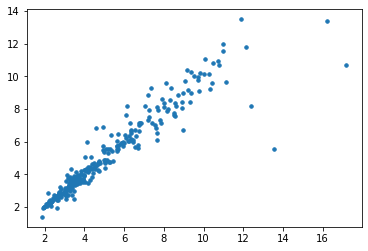

In [17]:
plt.scatter(x=y_test,y=svr_y_pred,s=12)

KERNEL RIDGE REGRESSION

In [18]:
kr_regressor=KernelRidge()

In [19]:
kr_params={'alpha':np.linspace(0.1,1,10),'kernel':['linear','laplacian','rbf']}
grid_search=GridSearchCV(estimator=kr_regressor,
                        param_grid=kr_params,cv=7,n_jobs=-1,
                        scoring='r2')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                                   kernel='linear', kernel_params=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel': ['linear', 'laplacian', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [20]:
grid_search.best_params_

{'alpha': 0.1, 'kernel': 'laplacian'}

In [21]:
kr_y_pred=grid_search.predict(X_test)
#svr_y_pred=scaler_y.inverse_transform(svr_y_pred)
#y_test=scaler_y.inverse_transform(y_test)

In [22]:
print(r2_score(y_test,kr_y_pred))
print(mean_absolute_error(y_test,kr_y_pred))
print(mean_squared_error(y_test,kr_y_pred))
print(np.sqrt(mean_squared_error(y_test,kr_y_pred)))

0.8672138606531312
0.5998573440369289
0.9492445340051804
0.9742918115252639


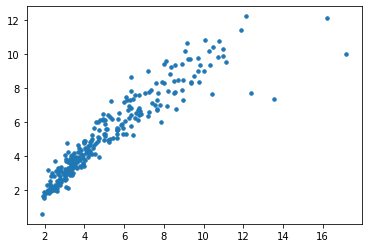

In [23]:
plt.scatter(x=y_test,y=kr_y_pred,s=12)

GRADIENT BOOST REGRESSOR

In [24]:
gb_regressor=GradientBoostingRegressor()

In [25]:
gb_params={'loss':['ls','lad','huber','quantile'],'learning_rate':np.linspace(0.1,2,5),'n_estimators':[200,250,300]}
grid_search=GridSearchCV(estimator=gb_regressor,
                        param_grid=gb_params,cv=7,n_jobs=-1,
                        scoring='r2')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [26]:
grid_search.best_params_

{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 300}

In [27]:
gb_y_pred=grid_search.predict(X_test)
#svr_y_pred=scaler_y.inverse_transform(svr_y_pred)
#y_test=scaler_y.inverse_transform(y_test)

In [28]:
print(r2_score(y_test,gb_y_pred))
print(mean_absolute_error(y_test,gb_y_pred))
print(mean_squared_error(y_test,gb_y_pred))
print(np.sqrt(mean_squared_error(y_test,gb_y_pred)))

0.8503125071815114
0.6186822735782582
1.0700667634873942
1.0344403141251766


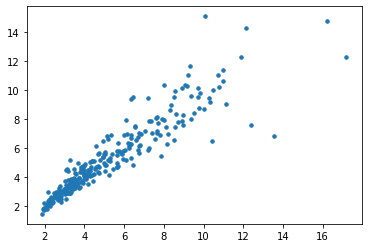

In [29]:
plt.scatter(x=y_test,y=gb_y_pred,s=12)

RANDOM FOREST REGRESSOR

In [36]:
rf_regressor=RandomForestRegressor()

In [37]:
rf_params={'n_estimators':[100,200,300]}
grid_search=GridSearchCV(estimator=rf_regressor,
                        param_grid=rf_params,cv=7,n_jobs=-1,
                        scoring='r2')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                                   kernel='linear', kernel_params=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel': ['linear', 'laplacian', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [38]:
grid_search.best_params_

{'alpha': 0.1, 'kernel': 'laplacian'}

In [39]:
rf_y_pred=grid_search.predict(X_test)
#svr_y_pred=scaler_y.inverse_transform(svr_y_pred)
#y_test=scaler_y.inverse_transform(y_test)

In [40]:
print(r2_score(y_test,rf_y_pred))
print(mean_absolute_error(y_test,rf_y_pred))
print(mean_squared_error(y_test,rf_y_pred))
print(np.sqrt(mean_squared_error(y_test,rf_y_pred)))

0.8672138606531312
0.5998573440369289
0.9492445340051804
0.9742918115252639


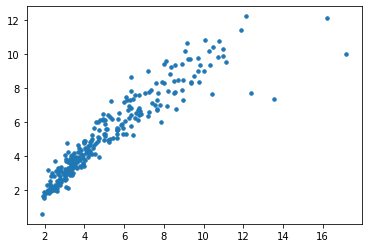

In [41]:
plt.scatter(x=y_test,y=rf_y_pred,s=12)

In [152]:
Y=np.concatenate([y_test.values.reshape(-1,1),svr_y_pred],axis=1)

In [153]:
Y=pd.DataFrame(Y)

In [154]:
Y.index=y_test.index
Y

,0,1
1170,5.868289,5.921853
942,3.493347,3.547076
1183,4.017911,5.081349
31,2.665381,2.744729
142,4.021912,3.555471
...,...,...
411,4.151390,6.004126
654,8.560989,8.389297
251,3.073437,2.696289
446,3.055763,3.046302


In [155]:
X=Data.iloc[Y.index,0]
X=pd.DataFrame(X)

In [156]:
Results=np.concatenate([X,Y],axis=1)
Results=pd.DataFrame(Results)

In [157]:
Results.columns=['Formula','Dataset','SVR']

In [158]:
Results['$\Deltaε$']=Results['Dataset']-Results['SVR']

In [159]:
Results['abs diff']=np.absolute(Results['$\Deltaε$'])

In [160]:
Difference=Results.sort_values(by=['abs diff'],ascending=False)

In [161]:
Difference.iloc[0:11,0:4]

,Formula,Dataset,SVR,$\Deltaε$
189,LiBC,13.5273,5.5564,7.9709
257,Ga2Te5,17.1926,10.6555,6.53712
164,LiAsS2,12.3851,8.19838,4.18672
97,In2HgTe4,16.2026,13.4046,2.798
128,ZrZnN2,8.9863,6.70853,2.27777
154,CdCN2,4.59332,6.86065,-2.26733
82,RhBr3,6.12443,8.16173,-2.0373
198,HfNCl,4.93717,6.89004,-1.95288
52,BaHfN2,7.35243,9.28128,-1.92885
268,Cs2HfI6,4.15139,6.00413,-1.85274
